In [2]:
import cv2
import numpy as np
from rag import *
from utils import *
from sprt import *
import matplotlib.pyplot as plt
from segment.watershed import *

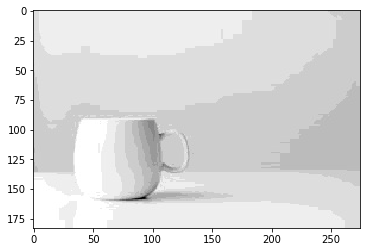

In [52]:
image = cv2.imread('cupq.jpg')
# image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA) 
im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [53]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
seg_im = watershed_segmentation(gray)
cv2.imwrite("img.jpeg", seg_im)


True

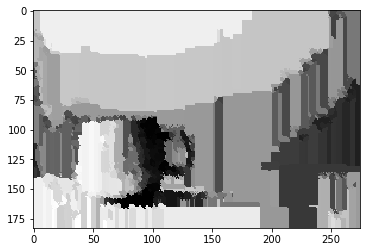

In [54]:
plt.imshow(seg_im,cmap = 'gray')
plt.show()

In [55]:
graph = RAG(im,seg_im)


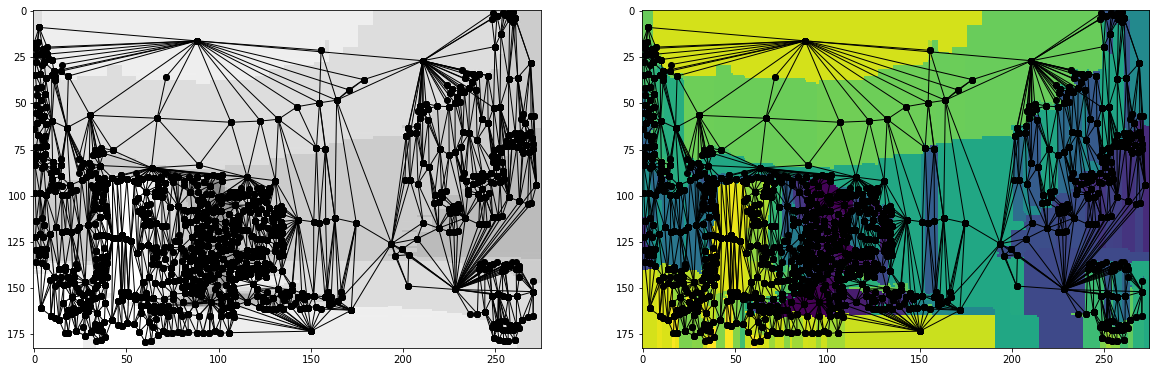

In [56]:
visualize_rag(im, seg_im, graph)

In [57]:
# construct NNG
def nng(graph):
    directed_edges={}
    labels = graph.nodes.keys()
    for l in labels:
        n_nodes = graph.edge_data.get(l) 
        min_w = max(graph.edges.values())
        from_node = l
        for n in n_nodes:
            w = graph.edges.get((l,n))
            if(w<=min_w):
                min_w = w
                to_node = n

        directed_edges[from_node] = to_node
    return directed_edges

        

In [58]:
def merge(to_merge,seg_im): 
    for i in to_merge:
        consistency = sprt_test(graph.nodes[i[0]],graph.nodes[i[1]]) 
        if(consistency==True):
            seg_im = np.where(seg_im==i[1],i[0],seg_im)
 
    return seg_im

In [60]:
flag= True
while(flag):
    label_num = len(np.unique(seg_im))
    directed_edges = nng(graph)
    
    # scan for cycle
    to_merge = []
    print(len(directed_edges.keys()))
    for f,t in directed_edges.items():
        d_node = directed_edges.get(t)
        if (d_node==f and (t,f) not in to_merge):
            to_merge.append((f,t))
    print(len(to_merge))
    seg_im = merge(to_merge,seg_im)
    graph = RAG(im,seg_im) 

    if(len(to_merge)==0):
        flag=False

    

457
43
454
43
452
42
451
42
451
42
447
41
445
40
445
40
444
39
443
39
443
39
443
39
443
39
441
40
440
39
440
39
440
39
438
40
436
40
435
39
434
39
433
39
432
39
430
38
430
38
430
38
430
38
428
39
427
38
427
38
427
38
425
38
425
38
424
38
423
38
422
38
422
38
422
38
421
38
420
37
420
37
418
37
418
37
418
37
417
36
417
36
417
36
417
36
417
36
417
36
417
36
417
36
416
36
415
36
414
36
414
36
413
36
413
36
413
36
412
36
411
36
410
36
409
37
407
36
406
35
405
35
405
35
405
35
405
35
405
35
404
35
404
35
404
35
404
35
403
35
403
35
403
35
403
35
403
35
402
35
401
35
399
35
398
35
398
35
398
35
397
36
397
36
396
36
396
36
396
36
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
395
35
394
35
393
35
392
34


KeyboardInterrupt: 

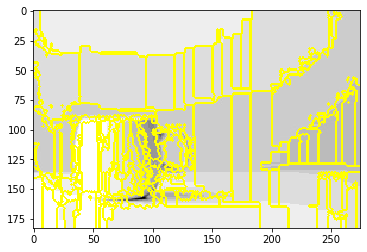

In [61]:
from skimage.segmentation import mark_boundaries
plt.imshow(mark_boundaries(im, seg_im))

In [63]:
print(len(np.unique(seg_im)))

392
